In [144]:
#These are the required libraries required for this analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
#reading the dataset required
hb=pd.read_csv("hotel_bookings.csv")
hb.shape

(119390, 32)

In [146]:
hb.sample(15)
#This is a sample of the dataset for the viewer's understanding

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
36491,Resort Hotel,0,112,2017,May,20,16,2,5,2,...,No Deposit,436.0,NaN,0,Transient,43.20,0,0,Check-Out,2017-05-23
95826,City Hotel,0,34,2016,August,34,16,2,7,3,...,No Deposit,9.0,NaN,0,Transient,168.30,0,1,Check-Out,2016-08-25
109804,City Hotel,0,34,2017,April,15,15,1,1,2,...,No Deposit,9.0,NaN,0,Transient,120.00,0,1,Check-Out,2017-04-17
10299,Resort Hotel,1,19,2017,February,8,25,1,1,2,...,No Deposit,240.0,NaN,0,Transient,62.00,0,3,Canceled,2017-02-12
91193,City Hotel,0,2,2016,June,25,16,0,2,2,...,No Deposit,9.0,NaN,0,Transient,129.00,0,1,Check-Out,2016-06-18
90599,City Hotel,0,118,2016,June,24,6,1,2,1,...,No Deposit,191.0,NaN,0,Transient-Party,110.00,0,0,Check-Out,2016-06-09
37166,Resort Hotel,0,295,2017,May,22,30,2,8,2,...,No Deposit,240.0,NaN,0,Transient,82.10,0,2,Check-Out,2017-06-09
17425,Resort Hotel,0,11,2015,October,41,10,0,1,2,...,No Deposit,281.0,NaN,0,Contract,45.00,0,0,Check-Out,2015-10-11
102663,City Hotel,0,232,2016,December,49,1,0,3,2,...,No Deposit,9.0,NaN,0,Transient,91.80,0,2,Check-Out,2016-12-04
53813,City Hotel,1,358,2016,June,27,30,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.00,0,0,Canceled,2015-10-21


In [147]:
#Basic information about the data
hb.info()
hb.columns
#Any one of the above command is usefull

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [148]:
"""This is the part where the dataset is preprocessed that is eliminating errors,negative values,redundancy and null values.
We can also change the colomn names to our understanding"""
hb.rename(columns={'adr':'avg_daily_rate'},inplace=True)
hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'avg_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [149]:
#The company column is not required in this analysis and most of the data is missing from the column
hb.drop('company',axis='columns',inplace=True)
#To check whether the column is dropped
hb.shape

(119390, 31)

In [150]:
#To check the no. of null values in each column
hb.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [151]:
#To eliminate all the null values
hb.dropna(inplace=True)
#To check if there is any more null values
hb.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
avg_daily_rate                    0
required_car_parking_spaces 

In [152]:
#To find out the redundancy in the dataset
hb.duplicated().sum()

27823

In [153]:
#Removing redundancy
hb=hb.drop_duplicates()
#Check redundancy again
hb.duplicated().sum()

0

In [154]:
"""To check if there is any negative value. The describe() returns some of the statistical operations like mean,percentile,
min,amx,etc"""
hb.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,avg_daily_rate,required_car_parking_spaces,total_of_special_requests
count,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000
mean,0.299210,86.921981,2016.225520,26.919716,15.797818,1.070253,2.751036,1.924591,0.148899,0.010510,0.014626,0.019688,0.032889,0.248218,93.932784,0.810273,110.199214,0.072145,0.739420
std,0.457915,85.956707,0.682752,13.363077,8.845078,1.032607,2.042798,0.519041,0.471509,0.113361,0.120052,0.316184,0.509008,0.698098,113.111819,10.573899,54.386522,0.260218,0.832634
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,76.000000,0.000000,0.000000
50%,0.000000,59.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,101.600000,0.000000,1.000000
75%,1.000000,134.000000,2017.000000,37.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,136.810000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


In [155]:
"""According to the above operations, we can see a negative value as the minimum data in the avg_daily_rate column and it
cannot be negative"""
hb.drop(hb[hb.avg_daily_rate<1.0].index,inplace=True)
"""For checking the remaining values in the dataset"""
hb.shape

(74178, 31)

In [156]:
#children datatype was in float,converted to integer
hb['children'] = hb['children'].apply(np.int64)
hb['children'].dtypes

dtype('int64')

In [157]:
"""With the help of data visualization functions of python we can find out the relation between different attributes or 
between different tuples."""
hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'avg_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [158]:
"""As you can see the no. of city hotels is more than the no. of resort hotels.It is because the demand of city hotels are 
more and they are cheap"""
hb['hotel'].value_counts()

City Hotel      47327
Resort Hotel    26851
Name: hotel, dtype: int64

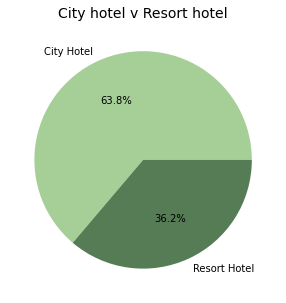

In [159]:
#Let's visualize it now 
labels=hb.hotel.value_counts().index
sizes=hb.hotel.value_counts()#These two commands are used in store the no. of values for each tuple.
plt.figure(figsize=(5,5))#defining the grid size
plt.pie(sizes,labels=labels,autopct='%1.1f%%',colors=['#A6CF98','#557C55'])#autopct is the format for accurate percentage 
plt.title('City hotel v Resort hotel',color = 'black', fontsize= 14);

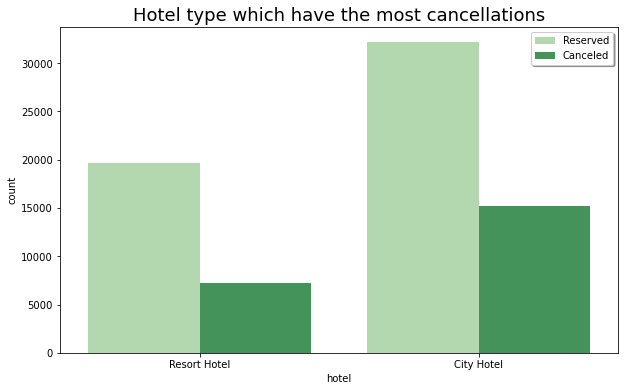

In [160]:
#Now let's see the comparison of the cancellation in the two types of hotels
plt.figure(figsize=(10,6))
sns.countplot(data=hb,x='hotel',hue='is_canceled',palette='Greens')
plt.title("Hotel type which have the most cancellations",fontsize=18)
plt.legend(['Reserved','Canceled'],shadow=True,loc=0)
plt.show()

In [161]:
#As the city hotel has more inflow of customers than resort hotels , we need the cancellation rate for each type
c_rate = hb.groupby(["hotel","is_canceled"]).size().reset_index(name='rate')
summe =c_rate.groupby("hotel")['rate'].transform("sum")#The transform function returns the operation on each group of data in this case sum.
c_rate['rate']=c_rate['rate'].div(summe)
c_rate
#The city has a higher rate of cancellation.It can be because of its cheap and most of the hotels don't have any proper 
#administrative policies

,hotel,is_canceled,rate
0,City Hotel,0,0.679549
1,City Hotel,1,0.320451
2,Resort Hotel,0,0.731146
3,Resort Hotel,1,0.268854


[Text(0, 0, 'Not canceled'), Text(1, 0, 'canceled')]

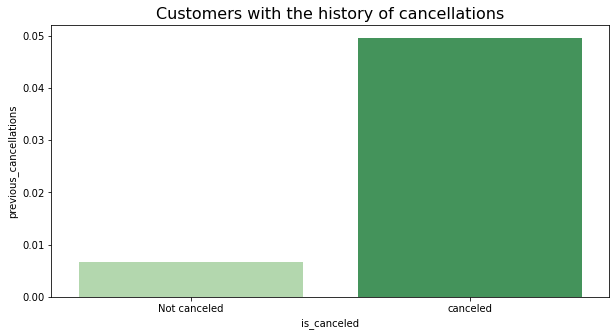

In [162]:
"""If we onserve the previous cancellation column of the customer who have cancelled at present, then they have a tendency 
to cancel"""
prev_can=hb.groupby('is_canceled',as_index=False)[['previous_cancellations']].mean()
plt.figure(figsize=(10,5))
plt.title("Customers with the history of cancellations",fontsize=16)
hoc=sns.barplot(data=prev_can,x=prev_can['is_canceled'],y=prev_can['previous_cancellations'],palette='Greens')
hoc.set_xticklabels(['Not canceled','canceled'])

In [163]:
#relation between the deposit type and cancellations
hb['deposit_type'].value_counts()

No Deposit    73297
Non Refund      845
Refundable       36
Name: deposit_type, dtype: int64

In [164]:
dep_can_data=hb.groupby("deposit_type")["is_canceled"].describe()
dep_can_data

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,73297.0,0.293887,0.455544,0.0,0.0,0.0,1.0,1.0
Non Refund,845.0,0.975148,0.155766,0.0,1.0,1.0,1.0,1.0
Refundable,36.0,0.555556,0.503953,0.0,0.0,1.0,1.0,1.0


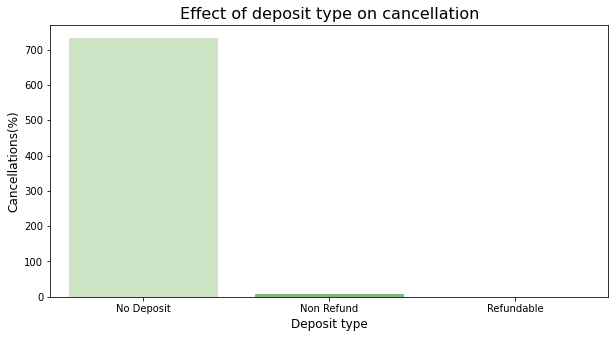

'When there is no deposit policy people tend to cancel more.'

In [165]:
#Now lets visualize it
plt.figure(figsize=(10,5))
sns.barplot(x=dep_can_data.index,y=dep_can_data["count"]/100,palette="Greens")#bar graph
plt.title("Effect of deposit type on cancellation",fontsize=16)
plt.xlabel("Deposit type",fontsize=12)
plt.ylabel("Cancellations(%)",fontsize=12)
plt.show()
"""When there is no deposit policy people tend to cancel more."""

In [166]:
hb_resort=hb[hb['hotel']=='Resort Hotel']
hb_city=hb[hb['hotel']=='City Hotel']

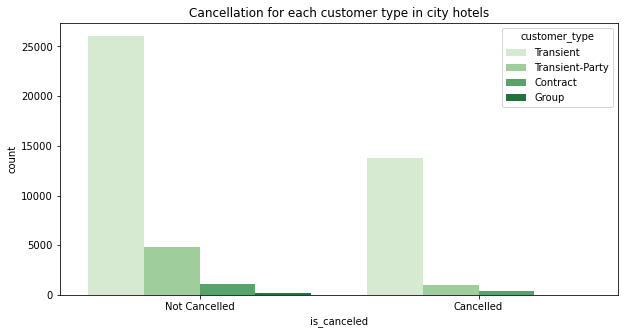

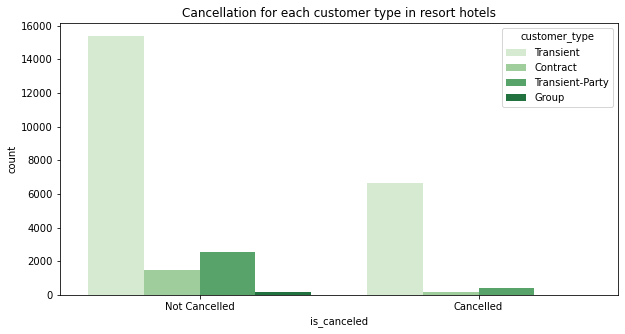

'According to the graphs below customers who are in contract or in groups'

In [167]:
#Relation between customer_type and cancellations
#Cancellation for each customer type in city hotels
plt.figure(figsize=(10,5))
city_hotel=sns.countplot(data=hb_city,x='is_canceled',hue='customer_type',palette='Greens')
plt.title('Cancellation for each customer type in city hotels')
city_hotel.set_xticklabels(['Not Cancelled','Cancelled'])
plt.show()

#Cancellation for each customer type in resort hotels   
plt.figure(figsize=(10,5))
resort_hotel=sns.countplot(data=hb_resort,x='is_canceled',hue='customer_type',palette='Greens')
plt.title('Cancellation for each customer type in resort hotels')
resort_hotel.set_xticklabels(['Not Cancelled','Cancelled'])
plt.show()
"""According to the graphs below customers who are in contract or in groups"""

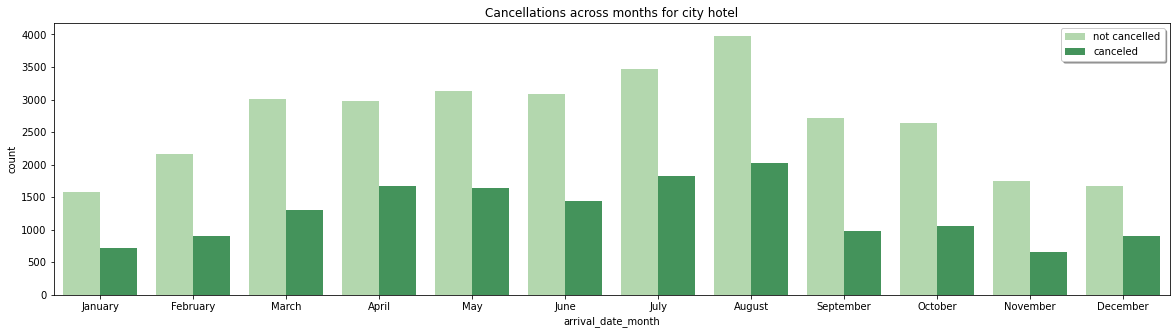

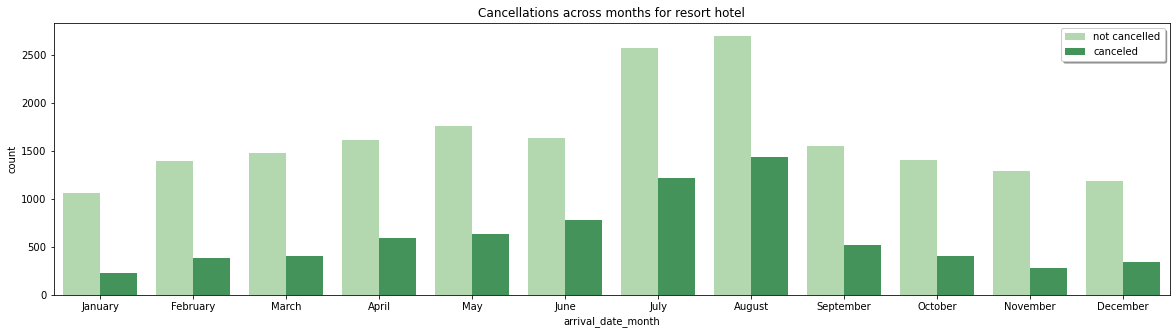

In [168]:
#Relation between different months with cancellations in city hotel
plt.figure(figsize=(20,5))
sns.countplot(data=hb_city,x='arrival_date_month',hue='is_canceled',palette='Greens',order=["January","February","March",
"April","May","June","July","August","September","October","November","December"])
plt.title("Cancellations across months for city hotel")
plt.legend(['not cancelled','canceled'],shadow=True,loc=0)
plt.show()

#Relation between different months with cancellations in resort hotel
plt.figure(figsize=(20,5))
sns.countplot(data=hb_resort,x='arrival_date_month',hue='is_canceled',palette='Greens',order=["January","February","March",
"April","May","June","July","August","September","October","November","December"])
plt.title("Cancellations across months for resort hotel")
plt.legend(['not cancelled','canceled'],shadow=True,loc=0)
plt.show()

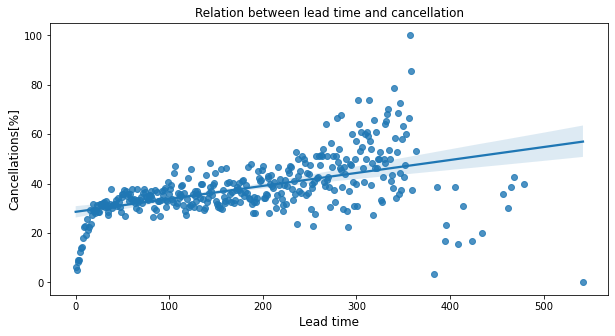

'According to the graph below bookings made many days advance are cancelled more often'

In [169]:
#Lead time is the no. of days before it is booked
lead_can=hb.groupby("lead_time")["is_canceled"].describe()

#We will only be using regular customers for this query.
#Customers who have more than 10 bookings
lead_can_10=lead_can.loc[lead_can["count"]>=10]
lead_can_10

#Now let's visualize it
plt.figure(figsize=(10,5))
sns.regplot(x=lead_can_10.index,y=lead_can_10["mean"].values*100)
plt.title("Relation between lead time and cancellation")
plt.xlabel("Lead time",fontsize=12)
plt.ylabel("Cancellations[%]",fontsize=12)
plt.show()
"""According to the graph below bookings made many days advance are cancelled more often"""

In [170]:
"""
To conclude the analysis we have some solutions to the above problems
1.There should be a database for customer profiles where it is mentioned that they have cancelled one or more times in the 
last year. There should be a limitation of how many times a customer can cancel bookings in a year.
2.Every hotel should have a percentage of cancellation charge added to the main bill.This can be applied everytime or peak
time(July,August,September) of the year.
3.The hotels can charge no cancellation fee if there is a booking for a whole group or are in contract because they cancel
less 
4.The hotels should not allow booking prior to more than 60 days."""

'\nTo conclude the analysis we have some solutions to the above problems\n1.There should be a database for customer profiles where it is mentioned that they have cancelled one or more times in the \nlast year. There should be a limitation of how many times a customer can cancel bookings in a year.\n2.Every hotel should have a percentage of cancellation charge added to the main bill.This can be applied everytime or peak\ntime(July,August,September) of the year.\n3.The hotels can charge no cancellation fee if there is a booking for a whole group or are in contract because they cancel\nless \n4.The hotels should not allow booking prior to more than 60 days.'